In [1]:
# notebook config
# jupyter notebook configuration
# change the cell width
from IPython.core.display import display, HTML
from IPython.display import IFrame
display(HTML("<style>.container { width:100% !important; }</style>"))


In [2]:
%%capture
!jupyter contrib nbextension install --user

### Lightning Talk
## Using Python to Analyze US Ballot Processing Laws
Election analyis by others can be good fun to read, but did you know how easy it is to use Python to clear up confusing info on your own?<br><br>
We'll learn how we can use Python & Plotly to create Sankey diagrams - and quickly understand complex info in a new way.<br><br><br>
<strong>About me </strong><br>
Chris Brousseau<em>
<p style="margin-left: 40px"> Surface Owl - Founder & Data Scientist<br>
IBM - Partner, Cognitive Services<br>
Prior work at Accenture & USAF<br>
Engineering @Boston University<br></em></p>

### AP News - 26 October 2020 -  When Advanced Votes May Be Counted
(Original - sorted alphabetically)
<br>
![AP News - varying deadlines could delay results](data/ap.when_votes_count.unsorted.800.jpg)
https://apnews.com/article/will-we-know-winner-election-night-17ab1b40d415512b495a374e68431921


### AP News - When Advanced Votes May Be Counted
(Updated graphic later in the day - sorted by law)
<br>
![AP News - varying deadlines could delay results](data/ap.when_votes_count.sorted.800.jpg)
https://apnews.com/article/will-we-know-winner-election-night-17ab1b40d415512b495a374e68431921

#[AP News - updated article in repo as image](data/ap.original_article.when_votes_counted.png)

### 270-to-Win Electoral College Forecast Map
![image of map as of 2020.10.26](data/270_to_win.concensus_forecast.png)

https://www.270towin.com/2020_Election/interactive_map

### 26 October 2020 - Quick analysis of the US 2020 election Ballot Processing Laws
#### Using Python 3 and Plotly

#### Main sources:
AP New - Voting Laws
https://apnews.com/article/will-we-know-winner-election-night-17ab1b40d415512b495a374e68431921

National Conference of State Legislatures - When Absentee/Mail Ballot Processing and Counting May Begin
https://www.ncsl.org/research/elections-and-campaigns/vopp-table-16-when-absentee-mail-ballot-processing-and-counting-can-begin.aspx

Wikipedia - Electoral College Votes by State (see Chronological table)
https://en.wikipedia.org/wiki/United_States_Electoral_College

270 to Win Electoral College Concensus Forecast
https://www.270towin.com/maps/consensus-2020-electoral-map-forecast

In [3]:
# python imports
import pandas as pd;
import plotly;
import chart_studio.plotly as py;
import plotly.io as pio;

# notebook config
pio.renderers;
pio.renderers.default = "browser";
 
from plotly.offline import init_notebook_mode;
init_notebook_mode(connected = True);

# show all table columns
pd.set_option('display.max_columns', None);

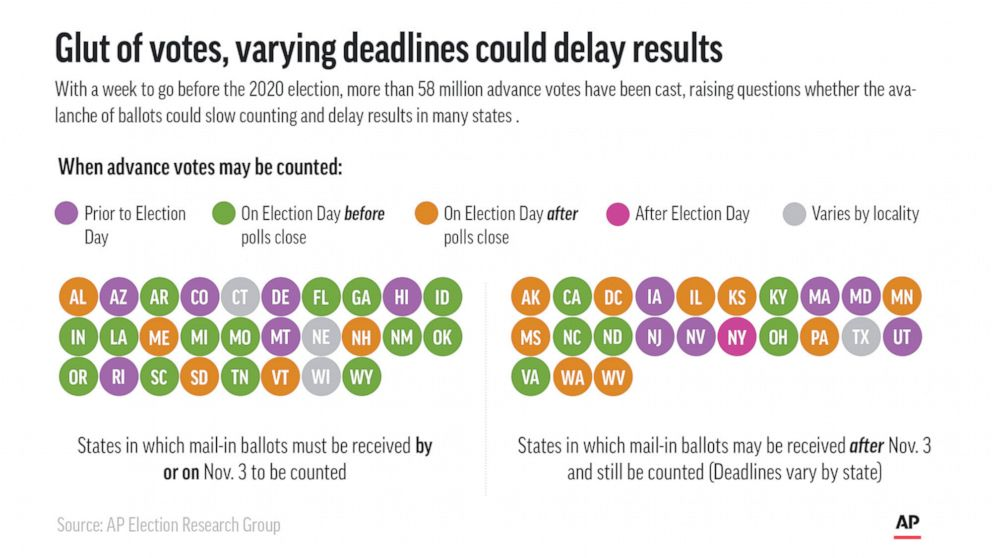

In [4]:
from IPython.core.display import Image, display
display(Image('data/ap.when_votes_count.unsorted.800.jpg', width=800, height=925, unconfined=True))

In [5]:
# analyze images and translate results into text; then load into pandas

df_state_map = pd.read_csv("data/sfgate_vote_count_map_states.csv")
df_state_map.head(5)

,ballot_receipt_date_law,state,color_map_law
0,ballot must be received by or on 3 nov,AL,brown
1,ballot must be received by or on 3 nov,AZ,purple
2,ballot must be received by or on 3 nov,AR,green
3,ballot must be received by or on 3 nov,CO,purple
4,ballot must be received by or on 3 nov,CT,grey


In [6]:
df_vote_count_laws = pd.read_csv("data/sfgate_vote_count_laws.csv")
df_vote_count_laws.head(5)

,color_map_law,begin_counting_law
0,purple,prior to election day
1,green,on election day before close
2,brown,on election day after close
3,light_purple,after election day
4,grey,varies by locality


In [7]:
df_state_electoral_forecast = pd.read_csv("data/2020_electoral_forecast.csv")
df_state_electoral_forecast.head(5)

,state,color_party,likelihood,electoral_college_votes
0,WA,blue,safe,12
1,OR,blue,safe,7
2,CA,blue,safe,55
3,AK,red,leaning,3
4,HI,blue,safe,4


In [8]:
result_law = pd.merge(df_state_map, 
                  df_vote_count_laws[['color_map_law', 'begin_counting_law']],
                  left_on='color_map_law',
                  right_on='color_map_law',
                  how='outer')

result_law.head(10)

,ballot_receipt_date_law,state,color_map_law,begin_counting_law
0,ballot must be received by or on 3 nov,AL,brown,on election day after close
1,ballot must be received by or on 3 nov,ME,brown,on election day after close
2,ballot must be received by or on 3 nov,NH,brown,on election day after close
3,ballot must be received by or on 3 nov,SD,brown,on election day after close
4,ballot must be received by or on 3 nov,VT,brown,on election day after close
5,ballot may be received after 3 nov,AK,brown,on election day after close
6,ballot may be received after 3 nov,DC,brown,on election day after close
7,ballot may be received after 3 nov,IL,brown,on election day after close
8,ballot may be received after 3 nov,KS,brown,on election day after close
9,ballot may be received after 3 nov,MN,brown,on election day after close


In [9]:
result_laws_plus_electoral = pd.merge(result_law, 
                  df_state_electoral_forecast[['state', 'color_party', 'likelihood', 'electoral_college_votes']],
                  left_on='state',
                  right_on='state',
                  how='outer')
                  
result_laws_plus_electoral.head(10)

,ballot_receipt_date_law,state,color_map_law,begin_counting_law,color_party,likelihood,electoral_college_votes
0,ballot must be received by or on 3 nov,AL,brown,on election day after close,red,safe,9
1,ballot must be received by or on 3 nov,ME,brown,on election day after close,split,split,4
2,ballot must be received by or on 3 nov,NH,brown,on election day after close,blue,leaning,4
3,ballot must be received by or on 3 nov,SD,brown,on election day after close,red,safe,3
4,ballot must be received by or on 3 nov,VT,brown,on election day after close,blue,safe,3
5,ballot may be received after 3 nov,AK,brown,on election day after close,red,leaning,3
6,ballot may be received after 3 nov,DC,brown,on election day after close,blue,safe,3
7,ballot may be received after 3 nov,IL,brown,on election day after close,blue,safe,20
8,ballot may be received after 3 nov,KS,brown,on election day after close,red,likely,6
9,ballot may be received after 3 nov,MN,brown,on election day after close,blue,leaning,10


In [10]:
combined_data = result_laws_plus_electoral[['ballot_receipt_date_law', 'begin_counting_law', 'color_party', 'likelihood', 'state', 'electoral_college_votes']]\
                .sort_values(['ballot_receipt_date_law', 'state'])

combined_data.head(5)

,ballot_receipt_date_law,begin_counting_law,color_party,likelihood,state,electoral_college_votes
5,ballot may be received after 3 nov,on election day after close,red,leaning,AK,3
40,ballot may be received after 3 nov,on election day before close,blue,safe,CA,55
6,ballot may be received after 3 nov,on election day after close,blue,safe,DC,3
20,ballot may be received after 3 nov,prior to election day,tossup,tossup,IA,6
7,ballot may be received after 3 nov,on election day after close,blue,safe,IL,20


In [11]:
# simplify column contents & replace values to improve sorting of sankey results
simplify_receipt_date = {"ballot must be received by or on 3 nov":"received by election day", "ballot may be received after 3 nov":"received post election day"}
simplify_counting_law = {"on election day before close":"count begins - election day before close", "election day - after close": "count begins - election day post close", "on election day after close": "count begins - election day post close"}
simplify_tossup = {"tossup-tossup":"tossup"}
simplify_split = {"split-split":"split"}

combined_data['forecast'] = combined_data['color_party'].str.cat(combined_data['likelihood'],sep="-")
combined_data['color_counting_law'] = combined_data['color_party'].str.cat(combined_data['begin_counting_law'],sep="-")

combined_data = combined_data.replace({"ballot_receipt_date_law":simplify_receipt_date}) \
                .replace({"begin_counting_law":simplify_counting_law}) \
                .replace({"forecast":simplify_tossup}) \
                .replace({"forecast":simplify_split}) \
                .replace({"prior to election day":"count before election day"}) \
                .replace({"varies by locality":"count begins - varies by locality"}) \
                .replace({"after election day":"count begins - post election day"}) \
                .replace({"before close":"election day-0-before close"}) \
                .replace({"after close":"election day-1-after close"})


#                .replace({"before election day":"count before election day"}) \

combined_data = combined_data[['ballot_receipt_date_law', 'begin_counting_law', 'color_counting_law', 'forecast', 'color_party', 'likelihood', 'state', 'electoral_college_votes']]

combined_data.head(10)

,ballot_receipt_date_law,begin_counting_law,color_counting_law,forecast,color_party,likelihood,state,electoral_college_votes
5,received post election day,count begins - election day post close,red-on election day after close,red-leaning,red,leaning,AK,3
40,received post election day,count begins - election day before close,blue-on election day before close,blue-safe,blue,safe,CA,55
6,received post election day,count begins - election day post close,blue-on election day after close,blue-safe,blue,safe,DC,3
20,received post election day,count before election day,tossup-prior to election day,tossup,tossup,tossup,IA,6
7,received post election day,count begins - election day post close,blue-on election day after close,blue-safe,blue,safe,IL,20
8,received post election day,count begins - election day post close,red-on election day after close,red-likely,red,likely,KS,6
41,received post election day,count begins - election day before close,red-on election day before close,red-safe,red,safe,KY,8
21,received post election day,count before election day,blue-prior to election day,blue-safe,blue,safe,MA,11
22,received post election day,count before election day,blue-prior to election day,blue-safe,blue,safe,MD,10
9,received post election day,count begins - election day post close,blue-on election day after close,blue-leaning,blue,leaning,MN,10


In [12]:
combined_data = combined_data.sort_values(['ballot_receipt_date_law', 'begin_counting_law', 'forecast'], ascending=False) \
                .groupby(['ballot_receipt_date_law', 'begin_counting_law'], sort=False) \
                .apply(lambda x: x.sort_values(['forecast'], ascending=False)) \
                .reset_index(drop=True)

combined_data.head(10)

,ballot_receipt_date_law,begin_counting_law,color_counting_law,forecast,color_party,likelihood,state,electoral_college_votes
0,received post election day,count begins - post election day,blue-after election day,blue-safe,blue,safe,NY,29
1,received post election day,count begins - election day post close,red-on election day after close,red-safe,red,safe,MS,6
2,received post election day,count begins - election day post close,red-on election day after close,red-safe,red,safe,WV,5
3,received post election day,count begins - election day post close,red-on election day after close,red-likely,red,likely,KS,6
4,received post election day,count begins - election day post close,red-on election day after close,red-leaning,red,leaning,AK,3
5,received post election day,count begins - election day post close,blue-on election day after close,blue-safe,blue,safe,DC,3
6,received post election day,count begins - election day post close,blue-on election day after close,blue-safe,blue,safe,IL,20
7,received post election day,count begins - election day post close,blue-on election day after close,blue-safe,blue,safe,WA,12
8,received post election day,count begins - election day post close,blue-on election day after close,blue-leaning,blue,leaning,MN,10
9,received post election day,count begins - election day post close,blue-on election day after close,blue-leaning,blue,leaning,PA,20


## Let's use a Sankey Diagram to understand Ballot Laws

### Why?
Sankey diagrams emphasize the major transfers or flows in a system<br>
We can use this to group our ballot law info in different ways<br>
Interactively explore relationships<br>

https://en.wikipedia.org/wiki/Sankey_diagram

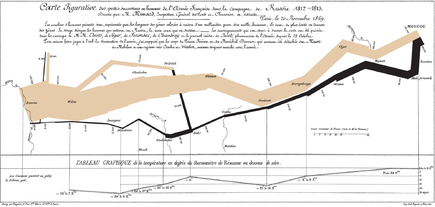

In [13]:
display(Image('data/435px-Minard.png', width=800, unconfined=True))

# To create a Sankey Diagram

Plotly and other libraries need a dictionary describing all of the nodes and links
with data for node organization, size, labels, etc.

This is created by:
- understanding that nodes are essentially unique categorical values in our data
- building an array of all the pairwise connections (links) between potential nodes
- aggregating all the links into a unique dictionary entry for each unique node
- feeding this dict to plotly

In [14]:
# explore color palettes from bokeh - list all available 
import bokeh.palettes as bp
bp.__palettes__


['Accent3',
 'Accent4',
 'Accent5',
 'Accent6',
 'Accent7',
 'Accent8',
 'Blues3',
 'Blues4',
 'Blues5',
 'Blues6',
 'Blues7',
 'Blues8',
 'Blues9',
 'Blues256',
 'Bokeh3',
 'Bokeh4',
 'Bokeh5',
 'Bokeh6',
 'Bokeh7',
 'BrBG3',
 'BrBG4',
 'BrBG5',
 'BrBG6',
 'BrBG7',
 'BrBG8',
 'BrBG9',
 'BrBG10',
 'BrBG11',
 'BuGn3',
 'BuGn4',
 'BuGn5',
 'BuGn6',
 'BuGn7',
 'BuGn8',
 'BuGn9',
 'BuPu3',
 'BuPu4',
 'BuPu5',
 'BuPu6',
 'BuPu7',
 'BuPu8',
 'BuPu9',
 'Category10_3',
 'Category10_4',
 'Category10_5',
 'Category10_6',
 'Category10_7',
 'Category10_8',
 'Category10_9',
 'Category10_10',
 'Category20_3',
 'Category20_4',
 'Category20_5',
 'Category20_6',
 'Category20_7',
 'Category20_8',
 'Category20_9',
 'Category20_10',
 'Category20_11',
 'Category20_12',
 'Category20_13',
 'Category20_14',
 'Category20_15',
 'Category20_16',
 'Category20_17',
 'Category20_18',
 'Category20_19',
 'Category20_20',
 'Category20b3',
 'Category20b4',
 'Category20b5',
 'Category20b6',
 'Category20b7',
 'Category20

In [15]:
# explore colorbrewer palettes with online tool:  https://colorbrewer2.org/#type=sequential&scheme=BuGn&n=3
# ...or
# get hex colors from palette - choose your own
bp.d3['Category20b'][6]

('#393b79', '#5254a3', '#6b6ecf', '#9c9ede', '#637939', '#8ca252')

In [16]:
# ref: https://medium.com/kenlok/how-to-create-sankey-diagrams-from-dataframes-in-python-e221c1b4d6b0
# by Ken Lok

def genSankey(df, cat_cols=[], value_cols='', title=''):
    """
    consume a dataframe, list of category columns for the sankey diagram
    plus a target columns to sum for the height of the sankey diagram nodes
    """
    # maximum of 6 value cols -> 6 colors
    # colorPalette = ['#679d64','#306998','#DDB372','#BD1919','#646464']
    colorPalette = ['#b35806',
                    '#f1a340',
                    '#fee0b6',
                    '#d8daeb',
                    '#998ec3',
                    '#542788'
                   ]
    labelList = []
    colorNumList = []
    for catCol in cat_cols:
        labelListTemp =  list(set(df[catCol].values))
        colorNumList.append(len(labelListTemp))
        labelList = labelList + labelListTemp
        
    # remove duplicates from labelList
    labelList = list(dict.fromkeys(labelList))
    labelList.sort() # sort labels by alpha, improves sankey readability
    
    # define colors based on number of levels
    colorList = []
    for idx, colorNum in enumerate(colorNumList):
        colorList = colorList + [colorPalette[idx]]*colorNum
        
    # transform df into a source-target pair
    for i in range(len(cat_cols)-1):
        if i==0:
            sourceTargetDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            sourceTargetDf.columns = ['source','target','sum']
        else:
            # only build source-destination pairs up to the last category column (cat_cols[i+1])
            tempDf = df[[cat_cols[i],cat_cols[i+1],value_cols]]
            tempDf.columns = ['source','target','sum']
            sourceTargetDf = pd.concat([sourceTargetDf,tempDf])
            
    # important!  group and sort values by ascending = easier reading sankey
    sourceTargetDf = sourceTargetDf.groupby(['source','target']).agg({'sum':'sum'}).sort_values(['source', 'target'], ascending=True).reset_index()
        
    # add index for source-target pair
    sourceTargetDf['sourceID'] = sourceTargetDf['source'].apply(lambda x: labelList.index(x))
    sourceTargetDf['targetID'] = sourceTargetDf['target'].apply(lambda x: labelList.index(x))
    
    # creating the sankey diagram
    data = dict(
        type='sankey',
        node = dict(
          pad = 15,
          thickness = 20,
          line = dict(
            color = "black",
            width = 0.5
          ),
          label = labelList,
          color = colorList
        ),
        link = dict(
          source = sourceTargetDf['sourceID'],
          target = sourceTargetDf['targetID'],
          value = sourceTargetDf['sum']
        )
      )
    
    layout =  dict(
        title = title,
        font = dict(
          size = 10
        )
    )
       
    fig = dict(data=[data], layout=layout)
        
    return fig, sourceTargetDf

In [17]:
list(combined_data.columns)

['ballot_receipt_date_law',
 'begin_counting_law',
 'color_counting_law',
 'forecast',
 'color_party',
 'likelihood',
 'state',
 'electoral_college_votes']

In [18]:
# generate one sankey diagram and resulting dataframe
fig1, resultdf = genSankey(combined_data, 
                 cat_cols=['ballot_receipt_date_law', 'begin_counting_law', 'state'], 
                 value_cols='electoral_college_votes', 
                 title='Figure 1 - 2020 Early/Absentee Voting Rules by Process')

In [19]:
# check out results of first dataframe
resultdf.tail(20)

,source,target,sum,sourceID,targetID
40,count begins - election day post close,KS,6,54,17
41,count begins - election day post close,ME,4,54,22
42,count begins - election day post close,MN,10,54,24
43,count begins - election day post close,MS,6,54,26
44,count begins - election day post close,NH,4,54,31
45,count begins - election day post close,PA,20,54,39
46,count begins - election day post close,SD,3,54,42
47,count begins - election day post close,VT,3,54,47
48,count begins - election day post close,WA,12,54,48
49,count begins - election day post close,WV,5,54,50


In [20]:
# plot the figures
fig1, resultdf = genSankey(combined_data, 
                 cat_cols=['ballot_receipt_date_law', 'begin_counting_law', 'state'], 
                 value_cols='electoral_college_votes', 
                 title='Figure 1 - 2020 Early/Absentee Voting Rules by Process')

plotly.offline.plot(fig1, validate=False, filename="figure1.html")


fig2, resultdf2 = genSankey(combined_data, 
                 cat_cols=['state', 'ballot_receipt_date_law', 'begin_counting_law'],
                 value_cols='electoral_college_votes', 
                 title='Figure 2 - Voting Rules by US State')

plotly.offline.plot(fig2, validate=False, filename="figure2.html")


fig3, resultdf3 = genSankey(combined_data, 
                 cat_cols=['begin_counting_law', 'ballot_receipt_date_law', 'forecast', 'state'],
                 value_cols='electoral_college_votes', 
                 title='Figure 3 - Voting Rules with Forecast')
plotly.offline.plot(fig3, validate=False, filename="figure3.html")

'figure3.html'

In [21]:
IFrame(src='./figure1.html', width=2000, height=925)

In [22]:
IFrame(src='./figure2.html', width=2000, height=925)

In [23]:
IFrame(src='./figure3.html', width=2000, height=925)

# What did we learn?

<b>Pro</b>
- sankey diagrams are useful for large datasets
- pretty easy to use python & plotly for quick results
- getting source data in usable form was pretty easy
- data engineering and sorting of data improves end graphics a lot

<b>Con</b>
- automatic styling / output looks okay but not great
- automated graphics need manual adjustment to look good


# The End


In [24]:
# https://www.codegrepper.com/code-examples/python/sankey+diagram+python+dataframe

import pandas as pd
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Nodes & links
nodes = [['ID', 'Label', 'Color'],
        [0,'AKJ Education','#4994CE'],
        [1,'Amazon','#8A5988'],
        [2,'Flipkart','#449E9E'],
        [3,'Books','#7FC241'],
        [4,'Computers & tablets','#D3D3D3'],
        [5,'Other','#4994CE'],]

# links with your data
links = [['Source','Target','Value','Link Color'],

        # AKJ
        [0,3,1,'rgba(127, 194, 65, 0.2)'],
        [0,4,1,'rgba(127, 194, 65, 0.2)'],

        # Amazon
        [1,3,1,'rgba(211, 211, 211, 0.5)'],
        [1,4,1,'rgba(211, 211, 211, 0.5)'],
        [1,5,1,'rgba(211, 211, 211, 0.5)'],

        # Flipkart
        [2,5,1,'rgba(253, 227, 212, 1)'],
        [2,3,1,'rgba(253, 227, 212, 1)'],]

# links with some data for illustrative purposes ################
#links = [
#    ['Source','Target','Value','Link Color'],
#    
#    # AKJ
#    [0,3,846888,'rgba(127, 194, 65, 0.2)'],
#    [0,4,1045,'rgba(127, 194, 65, 0.2)'],
#    
#    # Amazon
#    [1,3,1294423,'rgba(211, 211, 211, 0.5)'],
#    [1,4,42165,'rgba(211, 211, 211, 0.5)'],
#    [1,5,415,'rgba(211, 211, 211, 0.5)'],
#    
#    # Flipkart
#    [2,5,1,'rgba(253, 227, 212, 1)'],]
#################################################################


# Retrieve headers and build dataframes
nodes_headers = nodes.pop(0)
links_headers = links.pop(0)
df_nodes = pd.DataFrame(nodes, columns = nodes_headers)
df_links = pd.DataFrame(links, columns = links_headers)

# Sankey plot setup
data_trace = dict(
    type='sankey',
    domain = dict(
      x =  [0,1],
      y =  [0,1]
    ),
    orientation = "h",
    valueformat = ".0f",
    node = dict(
      pad = 10,
    # thickness = 30,
      line = dict(
        color = "black",
        width = 0
      ),
      label =  df_nodes['Label'].dropna(axis=0, how='any'),
      color = df_nodes['Color']
    ),
    link = dict(
      source = df_links['Source'].dropna(axis=0, how='any'),
      target = df_links['Target'].dropna(axis=0, how='any'),
      value = df_links['Value'].dropna(axis=0, how='any'),
      color = df_links['Link Color'].dropna(axis=0, how='any'),
  )
)

layout = dict(
        title = "Draw Sankey Diagram from dataframes",
    height = 772,
    font = dict(
      size = 10),)

fig = dict(data=[data_trace], layout=layout)
iplot(fig, validate=False)